In [46]:
import pandas as pd

In [47]:
df = pd.read_csv(r"C:\Users\matth\Desktop\Master\teamAverage\Combined_Themeparks.csv")
print('Original length of dataframe:', len(df))
df.head()

Original length of dataframe: 15443


,Date,Profile,Message,Number of Reactions,Number of Shares,Number of Comments (primary),Number of Shares.1,Comments per post,Comments on posts by fans,Post interaction rate,Engagement,Number of Likes,Link-posts,Picture Posts,Video-posts,Profile-ID,Post-ID,Link
0,12/31/23 9:40 PM,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16.0,NaN,2.0,2.0,2.0,2.0,"1,09E+12","1,09E+12",13.0,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...
1,12/31/23 8:01 PM,Fun Spot America,See you next year! 😉 Don’t miss...,38.0,NaN,1.0,2.0,1.0,1.0,"4,17E+11","4,17E+11",33.0,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...
2,12/31/23 7:30 PM,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23.0,NaN,2.0,3.0,2.0,2.0,"2,85E+11","2,85E+11",21.0,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...
3,12/31/23 7:00 PM,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646.0,NaN,52.0,12.0,56.0,56.0,"1,36E+11","1,36E+11",478.0,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...
4,12/31/23 7:00 PM,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17.0,NaN,2.0,0.0,2.0,2.0,"4,96E+11","4,96E+11",16.0,NaN,NaN,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...


In [48]:
# Extract the 'Date' column
date_column = df['Date']

# Display the 'Date' column
print(date_column)

0        12/31/23 9:40 PM
1        12/31/23 8:01 PM
2        12/31/23 7:30 PM
3        12/31/23 7:00 PM
4        12/31/23 7:00 PM
               ...       
15438    01/01/2023 02:00
15439    01/01/2023 01:20
15440    01/01/2023 00:01
15441    01/01/2023 00:00
15442    01/01/2023 00:00
Name: Date, Length: 15443, dtype: object


Split up the time of day in morning, afternoon and evening

In [49]:
# Split the 'Date' column into 'Date' and 'Time' columns
split_date_time = df['Date'].str.split(' ', n=1, expand=True)
split_date_time.columns = ['Date', 'Time']

# Combine date and time to create a datetime column
df['DateTime'] = pd.to_datetime(split_date_time['Date'] + ' ' + split_date_time['Time'])

# Categorize dates into days of the week (Monday to Sunday)
def categorize_day_of_week(date):
    return date.strftime('%A')  # Returns the day of the week as a string

# Apply categorization to create a new column 'Day of Week'
df['Day of Week'] = df['DateTime'].apply(categorize_day_of_week)

# Categorize times into morning, afternoon, and evening
def categorize_time(time):
    if time.hour < 12:
        return 'Morning'
    elif time.hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# Apply categorization to create a new column 'Time of Day'
df['Time of Day'] = df['DateTime'].apply(categorize_time)

# Display the result
print(df[['Date', 'DateTime', 'Day of Week', 'Time of Day']])

C:\Users\matth\AppData\Local\Temp\ipykernel_19196\3430098498.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateTime'] = pd.to_datetime(split_date_time['Date'] + ' ' + split_date_time['Time'])


                   Date            DateTime Day of Week Time of Day
0      12/31/23 9:40 PM 2023-12-31 21:40:00      Sunday     Evening
1      12/31/23 8:01 PM 2023-12-31 20:01:00      Sunday     Evening
2      12/31/23 7:30 PM 2023-12-31 19:30:00      Sunday     Evening
3      12/31/23 7:00 PM 2023-12-31 19:00:00      Sunday     Evening
4      12/31/23 7:00 PM 2023-12-31 19:00:00      Sunday     Evening
...                 ...                 ...         ...         ...
15438  01/01/2023 02:00 2023-01-01 02:00:00      Sunday     Morning
15439  01/01/2023 01:20 2023-01-01 01:20:00      Sunday     Morning
15440  01/01/2023 00:01 2023-01-01 00:01:00      Sunday     Morning
15441  01/01/2023 00:00 2023-01-01 00:00:00      Sunday     Morning
15442  01/01/2023 00:00 2023-01-01 00:00:00      Sunday     Morning

[15443 rows x 4 columns]


Calculate the engagement

In [50]:
# Calculate Total Interactions (Engagement)
#df['Engagement'] = df['Number of Reactions'].fillna(0) + df['Number of Shares'].fillna(0) + df['Number of Comments (primary)'].fillna(0)

# Displaying the calculated engagement metric along with other relevant columns
print(df[['Date', 'Profile', 'Time of Day', 'Engagement']])

                   Date                                    Profile  \
0      12/31/23 9:40 PM                 Wild Adventures Theme Park   
1      12/31/23 8:01 PM                           Fun Spot America   
2      12/31/23 7:30 PM                           Fun Spot America   
3      12/31/23 7:00 PM                           Disneyland Paris   
4      12/31/23 7:00 PM                      Silverwood Theme Park   
...                 ...                                        ...   
15438  01/01/2023 02:00                 Wild Adventures Theme Park   
15439  01/01/2023 01:20                                   Playland   
15440  01/01/2023 00:01                           Disneyland Paris   
15441  01/01/2023 00:00  Six Flags Over Georgia & Hurricane Harbor   
15442  01/01/2023 00:00                         Knott's Berry Farm   

      Time of Day Engagement  
0         Evening   1,09E+12  
1         Evening   4,17E+11  
2         Evening   2,85E+11  
3         Evening   1,36E+11  
4   

In [51]:
# Remove the comma from the string and convert it to a float
df['Engagement'] = df['Engagement'].str.replace(',', '.').astype(float)

import pandas as pd
from scipy.stats import f_oneway

# Assuming 'df' is your DataFrame containing the dataset

# Perform ANOVA test
result = f_oneway(
    df[df['Time of Day'] == 'Morning']['Engagement'].dropna(),
    df[df['Time of Day'] == 'Afternoon']['Engagement'].dropna(),
    df[df['Time of Day'] == 'Evening']['Engagement'].dropna()
)

# Display ANOVA test results
print("ANOVA Test Results:")
print("F-statistic:", result.statistic)
print("p-value:", result.pvalue)

# Interpret the results
alpha = 0.05  # significance level
if result.pvalue < alpha:
    print("The p-value is less than", alpha, "so we reject the null hypothesis.")
    print("There is evidence to suggest that post time significantly affects user engagement in Facebook posts.")
else:
    print("The p-value is greater than or equal to", alpha, "so we fail to reject the null hypothesis.")
    print("There is no significant evidence to suggest that post time affects user engagement in Facebook posts.")


In [52]:
# Print column names in the DataFrame
print(df.columns)


Index(['Date', 'Profile', 'Message', 'Number of Reactions', 'Number of Shares',
       'Number of Comments (primary)', 'Number of Shares.1',
       'Comments per post', 'Comments on posts by fans',
       'Post interaction rate', 'Engagement', 'Number of Likes', 'Link-posts',
       'Picture Posts', 'Video-posts', 'Profile-ID', 'Post-ID', 'Link',
       'DateTime', 'Day of Week', 'Time of Day'],
      dtype='object')


In [53]:
# Extract unique weekdays
unique_weekdays = df['Day of Week'].unique()

# Display the unique weekdays
print("Unique Weekdays:")
for weekday in unique_weekdays:
    print(weekday)

Unique Weekdays:
Sunday
Saturday
Friday
Thursday
Wednesday
Tuesday
Monday


In [54]:
# Extract unique times of the day
unique_times_of_day = df['Time of Day'].unique()

# Display the unique times of the day
print("Unique Times of Day:")
for time_of_day in unique_times_of_day:
    print(time_of_day)

Unique Times of Day:
Evening
Afternoon
Morning


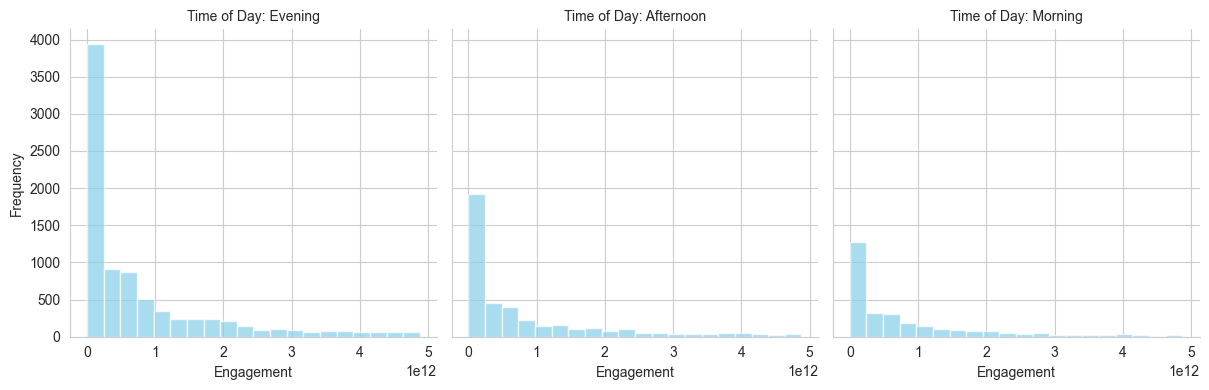

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the seaborn plots
sns.set_style("whitegrid")

# Create a facet grid of histograms
g = sns.FacetGrid(df, col='Time of Day', col_wrap=3, height=4)
g.map(plt.hist, 'Engagement', bins=20, color='skyblue', alpha=0.7)

# Set labels and titles
g.set_axis_labels("Engagement", "Frequency")
g.set_titles("Time of Day: {col_name}")

# Show the plot
plt.show()


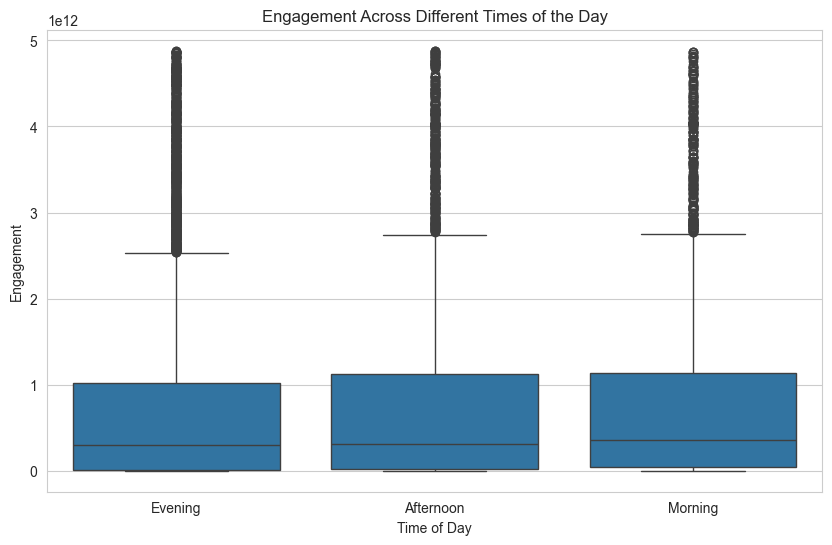

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Time of Day', y='Engagement', data=df)
plt.title('Engagement Across Different Times of the Day')
plt.xlabel('Time of Day')
plt.ylabel('Engagement')
plt.show()

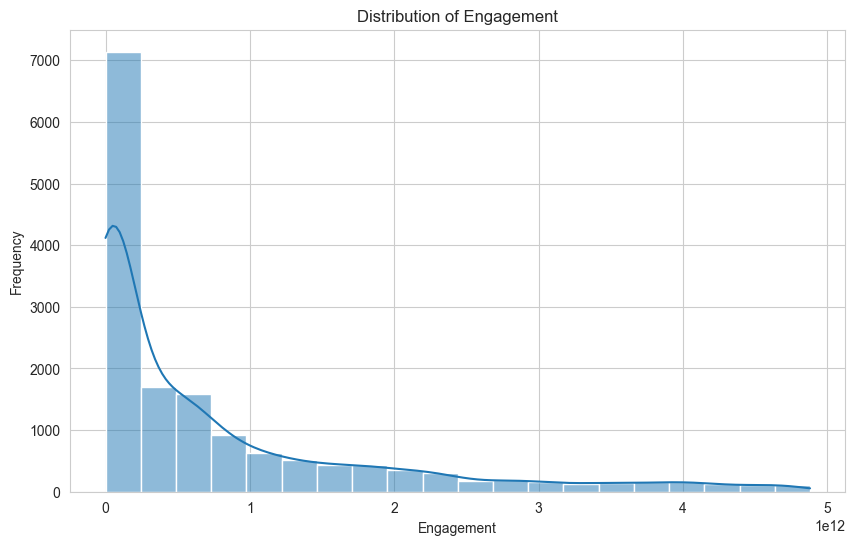

In [57]:
# Create histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Engagement'], bins=20, kde=True)
plt.title('Distribution of Engagement')
plt.xlabel('Engagement')
plt.ylabel('Frequency')
plt.show()


Shapiro-Wilk test to see if the data is normally distributed

In [58]:
from scipy.stats import shapiro

# Shapiro-Wilk test for normality
statistic, p_value = shapiro(df['Engagement'])

# Display the test result
print("Shapiro-Wilk Test Results:")
print("Test Statistic:", statistic)
print("p-value:", p_value)

# Interpretation
alpha = 0.05  # significance level
if p_value > alpha:
    print("The data follows a normal distribution (fail to reject the null hypothesis).")
else:
    print("The data does not follow a normal distribution (reject the null hypothesis).")


Shapiro-Wilk Test Results:
Test Statistic: 0.7344926595687866
p-value: 0.0
The data does not follow a normal distribution (reject the null hypothesis).


c:\Users\matth\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


levene test to look at the homogeneity of varianc

In [59]:
from scipy.stats import levene

# Levene's test for homogeneity of variance
statistic, p_value = levene(
    df[df['Time of Day'] == 'Morning']['Engagement'].dropna(),
    df[df['Time of Day'] == 'Afternoon']['Engagement'].dropna(),
    df[df['Time of Day'] == 'Evening']['Engagement'].dropna()
)

# Display the test result
print("Levene's Test Results:")
print("Test Statistic:", statistic)
print("p-value:", p_value)

# Interpretation
alpha = 0.05  # significance level
if p_value > alpha:
    print("The variances are approximately equal across groups (fail to reject the null hypothesis).")
else:
    print("The variances are significantly different across groups (reject the null hypothesis).")


Levene's Test Results:
Test Statistic: 2.530363623271553
p-value: 0.07966308072019027
The variances are approximately equal across groups (fail to reject the null hypothesis).


Anova test to check

In [60]:
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Perform ANOVA test
result_anova = f_oneway(
    df[df['Time of Day'] == 'Morning']['Engagement'].dropna(),
    df[df['Time of Day'] == 'Afternoon']['Engagement'].dropna(),
    df[df['Time of Day'] == 'Evening']['Engagement'].dropna()
)

# Display ANOVA test results
print("ANOVA Test Results:")
print("F-statistic:", result_anova.statistic)
print("p-value:", result_anova.pvalue)

# Perform post hoc analysis (Tukey's HSD)
if result_anova.pvalue < 0.05:  # Check if ANOVA result is significant
    posthoc = pairwise_tukeyhsd(df['Engagement'], df['Time of Day'], alpha=0.05)
    print("\nPost Hoc Analysis (Tukey's HSD):")
    print(posthoc)

    # Interpretation
    morning_vs_afternoon = posthoc.reject[0]  # Compare morning vs afternoon
    if morning_vs_afternoon:
        print("\nThere is a significant difference between morning and afternoon posts.")
    else:
        print("\nThere is no significant difference between morning and afternoon posts.")
else:
    print("\nNo significant difference among time periods.")


ANOVA Test Results:
F-statistic: 3.253911346266927
p-value: 0.03864933184048914

Post Hoc Analysis (Tukey's HSD):
                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
  group1   group2      meandiff     p-adj        lower            upper       reject
------------------------------------------------------------------------------------
Afternoon Evening -43912812942.1626 0.0858 -92458264002.4872   4632638118.162  False
Afternoon Morning    2377163455.635 0.9955 -59492387572.1784 64246714483.4484  False
  Evening Morning  46289976397.7976 0.1188  -8687207139.8298 101267159935.425  False
------------------------------------------------------------------------------------

There is no significant difference between morning and afternoon posts.


Welch Anova test

In [61]:
import pingouin as pg

# Perform Welch's ANOVA test
result_welch_anova = pg.welch_anova(
    data=df,
    dv='Engagement',
    between='Time of Day'
)

# Display Welch's ANOVA test results
print("Welch's ANOVA Test Results:")
print(result_welch_anova)


Welch's ANOVA Test Results:
        Source  ddof1        ddof2         F     p-unc       np2
0  Time of Day      2  6913.670663  3.243358  0.039092  0.000421


Kruskal-Wallis test to answer H1a

In [70]:
from scipy.stats import kruskal

# Define the engagement data for each time period
engagement_morning = df[df['Time of Day'] == 'Morning']['Engagement'].dropna()
engagement_afternoon = df[df['Time of Day'] == 'Afternoon']['Engagement'].dropna()
engagement_evening = df[df['Time of Day'] == 'Evening']['Engagement'].dropna()

# Perform Kruskal-Wallis test
result_kruskal = kruskal(engagement_morning, engagement_afternoon, engagement_evening)

# Display Kruskal-Wallis test results
print("Kruskal-Wallis Test Results:")
print("H-statistic:", result_kruskal.statistic)
print("p-value:", result_kruskal.pvalue)

# Interpret the results
alpha = 0.05
if result_kruskal.pvalue < alpha:
    print("There is a significant difference in user engagement levels among posts made during different time periods (reject the null hypothesis).")
else:
    print("There is no significant difference in user engagement levels among posts made during different time periods (fail to reject the null hypothesis).")


Kruskal-Wallis Test Results:
H-statistic: 13.045974487026838
p-value: 0.0014692734625790177
There is a significant difference in user engagement levels among posts made during different time periods (reject the null hypothesis).


from scipy.stats import kruskal, mannwhitneyu
from itertools import combinations

# Define the time periods for comparison
time_periods = ['Morning', 'Afternoon', 'Evening']

# Perform Kruskal-Wallis test
result_kruskal = kruskal(
    df[df['Time of Day'] == 'Morning']['Engagement'].dropna(),
    df[df['Time of Day'] == 'Afternoon']['Engagement'].dropna(),
    df[df['Time of Day'] == 'Evening']['Engagement'].dropna()
)

# Display Kruskal-Wallis test results
print("Kruskal-Wallis Test Results:")
print("H-statistic:", result_kruskal.statistic)
print("p-value:", result_kruskal.pvalue)

# Perform pairwise comparisons using Mann-Whitney U test with Bonferroni correction
alpha = 0.05
n_groups = len(time_periods)
pairwise_comparisons = list(combinations(time_periods, 2))
for group1, group2 in pairwise_comparisons:
    group1_data = df[df['Time of Day'] == group1]['Engagement'].dropna()
    group2_data = df[df['Time of Day'] == group2]['Engagement'].dropna()
    
    # Perform Mann-Whitney U test
    result_mannwhitney = mannwhitneyu(group1_data, group2_data)
    
    # Apply Bonferroni correction to the significance level
    adjusted_alpha = alpha / len(pairwise_comparisons)
    
    # Display pairwise comparison results
    print(f"\nPairwise Comparison: {group1} vs {group2}")
    print("U-statistic:", result_mannwhitney.statistic)
    print("p-value:", result_mannwhitney.pvalue)
    if result_mannwhitney.pvalue < adjusted_alpha:
        print("The difference is statistically significant (reject the null hypothesis).")
    else:
        print("There is no statistically significant difference (fail to reject the null hypothesis).")


In [69]:
from scipy.stats import kruskal, mannwhitneyu
from itertools import combinations

# Define the time periods for comparison
time_periods = ['Morning', 'Afternoon', 'Evening']

# Perform Kruskal-Wallis test
result_kruskal = kruskal(
    df[df['Time of Day'] == 'Morning']['Engagement'].dropna(),
    df[df['Time of Day'] == 'Afternoon']['Engagement'].dropna(),
    df[df['Time of Day'] == 'Evening']['Engagement'].dropna()
)

# Display Kruskal-Wallis test results
print("Kruskal-Wallis Test Results:")
print("H-statistic:", result_kruskal.statistic)
print("p-value:", result_kruskal.pvalue)

# Perform pairwise comparisons using Mann-Whitney U test with Bonferroni correction
alpha = 0.05
n_groups = len(time_periods)
pairwise_comparisons = list(combinations(time_periods, 2))
for group1, group2 in pairwise_comparisons:
    group1_data = df[df['Time of Day'] == group1]['Engagement'].dropna()
    group2_data = df[df['Time of Day'] == group2]['Engagement'].dropna()
    
    # Perform Mann-Whitney U test
    result_mannwhitney = mannwhitneyu(group1_data, group2_data)
    
    # Apply Bonferroni correction to the significance level
    adjusted_alpha = alpha / len(pairwise_comparisons)
    
    # Display pairwise comparison results
    print(f"\nPairwise Comparison: {group1} vs {group2}")
    print("U-statistic:", result_mannwhitney.statistic)
    print("p-value:", result_mannwhitney.pvalue)
    if result_mannwhitney.pvalue < adjusted_alpha:
        print("The difference is statistically significant (reject the null hypothesis).")
    else:
        print("There is no statistically significant difference (fail to reject the null hypothesis).")


Kruskal-Wallis Test Results:
H-statistic: 13.045974487026838
p-value: 0.0014692734625790177

Pairwise Comparison: Morning vs Afternoon
U-statistic: 6132313.5
p-value: 0.09502203540421394
There is no statistically significant difference (fail to reject the null hypothesis).

Pairwise Comparison: Morning vs Evening
U-statistic: 12746916.0
p-value: 0.0004488453261844004
The difference is statistically significant (reject the null hypothesis).

Pairwise Comparison: Afternoon vs Evening
U-statistic: 17708770.5
p-value: 0.06565687691921648
There is no statistically significant difference (fail to reject the null hypothesis).


Mann-Whitney U test to answer H1b

from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test (Morning vs. Afternoon)
result_mannwhitney = mannwhitneyu(
    df[df['Time of Day'] == 'Morning']['Engagement'].dropna(),
    df[df['Time of Day'] == 'Afternoon']['Engagement'].dropna()
)

# Display Mann-Whitney U test results
print("Mann-Whitney U Test Results:")
print("U-statistic:", result_mannwhitney.statistic)
print("p-value:", result_mannwhitney.pvalue)


In [64]:
from scipy.stats import mannwhitneyu

# Define the time periods for comparison
time_periods = ['Morning', 'Afternoon', 'Evening']

# Perform Mann-Whitney U tests for each pair of time periods
for i in range(len(time_periods)):
    for j in range(i+1, len(time_periods)):
        # Select engagement data for the current pair of time periods
        data_1 = df[df['Time of Day'] == time_periods[i]]['Engagement'].dropna()
        data_2 = df[df['Time of Day'] == time_periods[j]]['Engagement'].dropna()
        
        # Perform Mann-Whitney U test
        result = mannwhitneyu(data_1, data_2)
        
        # Display Mann-Whitney U test results
        print(f"Mann-Whitney U Test Results for {time_periods[i]} vs {time_periods[j]}:")
        print("U-statistic:", result.statistic)
        print("p-value:", result.pvalue)
        
        # Determine if the test passes or fails based on the significance level (e.g., 0.05)
        alpha = 0.05
        if result.pvalue < alpha:
            print("The difference is statistically significant (reject the null hypothesis).")
        else:
            print("There is no statistically significant difference (fail to reject the null hypothesis).")
        print()


Mann-Whitney U Test Results for Morning vs Afternoon:
U-statistic: 6132313.5
p-value: 0.09502203540421394
There is no statistically significant difference (fail to reject the null hypothesis).

Mann-Whitney U Test Results for Morning vs Evening:
U-statistic: 12746916.0
p-value: 0.0004488453261844004
The difference is statistically significant (reject the null hypothesis).

Mann-Whitney U Test Results for Afternoon vs Evening:
U-statistic: 17708770.5
p-value: 0.06565687691921648
There is no statistically significant difference (fail to reject the null hypothesis).



In [65]:
from scipy.stats import mannwhitneyu
import numpy as np

# Define the time periods for comparison
time_periods = ['Morning', 'Afternoon', 'Evening']

# Define a function to calculate the Common Language Effect Size
def cles_ind(x1, x2):
    """Calculate Common Language Effect Size Indicator for independent groups.
    Arguments:
    x1, x2: Arrays of values for two groups
    Returns:
    cles: Common Language Effect Size
    """
    x1 = np.array(x1)
    x2 = np.array(x2)
    diff = x1[:, None] - x2
    cles = (diff > 0).sum() / diff.size
    return cles

# Perform Mann-Whitney U tests for each pair of time periods
for i in range(len(time_periods)):
    for j in range(i+1, len(time_periods)):
        # Select engagement data for the current pair of time periods
        data_1 = df[df['Time of Day'] == time_periods[i]]['Engagement'].dropna()
        data_2 = df[df['Time of Day'] == time_periods[j]]['Engagement'].dropna()
        
        # Perform Mann-Whitney U test
        result = mannwhitneyu(data_1, data_2)
        
        # Display Mann-Whitney U test results
        print(f"Mann-Whitney U Test Results for {time_periods[i]} vs {time_periods[j]}:")
        print("U-statistic:", result.statistic)
        print("p-value:", result.pvalue)
        
        # Determine if the test passes or fails based on the significance level (e.g., 0.05)
        alpha = 0.05
        if result.pvalue < alpha:
            print("The difference is statistically significant (reject the null hypothesis).")
        else:
            print("There is no statistically significant difference (fail to reject the null hypothesis).")
        print()
        
        # Calculate the Common Language Effect Size
        cles = cles_ind(data_1, data_2)
        print("Common Language Effect Size:", cles)
        print()


Mann-Whitney U Test Results for Morning vs Afternoon:
U-statistic: 6132313.5
p-value: 0.09502203540421394
There is no statistically significant difference (fail to reject the null hypothesis).

Common Language Effect Size: 0.511417788253262

Mann-Whitney U Test Results for Morning vs Evening:
U-statistic: 12746916.0
p-value: 0.0004488453261844004
The difference is statistically significant (reject the null hypothesis).



Common Language Effect Size: 0.5215645709461363

Mann-Whitney U Test Results for Afternoon vs Evening:
U-statistic: 17708770.5
p-value: 0.06565687691921648
There is no statistically significant difference (fail to reject the null hypothesis).

Common Language Effect Size: 0.5098734243867524



In [66]:
from tabulate import tabulate

# Display the top 25 results of the DataFrame in a formatted table
print(tabulate(df.head(25), headers='keys', tablefmt='fancy_grid'))

╒════╤═══════════════════╤═══════════════════════════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤═══════════════════════╤════════════════════╤════════════════════════════════╤══════════════════════╤═════════════════════╤═════════════════════════════╤═════════════════════════╤══════════════╤═══════════════════╤══════════════╤═════════════════╤═══════════════╤══════════════════╤══════════════════════════════════╤════════════════════